# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [2]:
vaccination_tbl = read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  index = col_double(),
  state = col_character(),
  year = col_character(),
  name = col_character(),
  type = col_character(),
  city = col_character(),
  county = col_character(),
  district = col_logical(),
  enroll = col_double(),
  mmr = col_double(),
  overall = col_double(),
  xrel = col_logical(),
  xmed = col_double(),
  xper = col_double(),
  lat = col_double(),
  lng = col_double()
)




In [3]:
vaccination_tbl %>% head(col = inf)

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [3]:
# create the df_vacc_rates here
df_vacc_rates = vaccination_tbl %>%
    filter(mmr >= 0) %>%
    group_by(state) %>%
    mutate(sum_mmr = sum(mmr >= 95, na.rm = T)/n())


In [4]:
df_vacc_rates %>% tail

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng,sum_mmr
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1363,Washington,null,Central Education Services,NA,Bellevue,King,NA,NA,25.00,25.00,NA,NA,NA,47.61059,-122.1786,0.3265925
1364,Washington,null,Overcomer Academy,NA,Auburn,King,NA,NA,23.53,17.65,NA,11.76,23.53,47.30112,-122.2763,0.3265925
1365,Washington,null,Salvation Christian Academy- Formerly Slavic Christian Academy-Edgewood,NA,Edgewood,Pierce,NA,NA,22.22,22.22,NA,NA,55.56,47.24902,-122.2876,0.3265925
1366,Washington,null,Saratoga,NA,Stanwood,Snohomish,NA,NA,20.00,20.00,NA,6.67,26.67,48.24258,-122.3591,0.3265925
1367,Washington,null,Skagit Family Learning Center,NA,Mount Vernon,Skagit,NA,NA,17.65,11.76,NA,2.94,20.59,48.40643,-122.3392,0.3265925
1368,Washington,null,Snohomish Center,NA,Snohomish,Snohomish,NA,NA,10.00,10.00,NA,NA,NA,47.93177,-122.0988,0.3265925


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [5]:
df_vacc_rates %>%
    group_by(state) %>%
    arrange(desc(sum_mmr))

#Illinois

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng,sum_mmr
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Illinois,2018-19,7th Grade Academy,NA,Cahokia,Saint Clair,NA,228,100,-1,NA,NA,NA,38.56193,-90.13187,0.8968254
2,Illinois,2018-19,8th Grade Academy,NA,Cahokia,Saint Clair,NA,244,100,-1,NA,NA,NA,38.56143,-90.13002,0.8968254
3,Illinois,2018-19,A Mothers Touch Learning Academy,NA,Des Plaines,Cook,NA,6,100,-1,NA,NA,NA,42.04665,-87.88258,0.8968254
4,Illinois,2018-19,A Mothers Touch Lrning Center,NA,Arlington Heights,Cook,NA,21,100,-1,NA,NA,NA,42.09780,-87.97071,0.8968254
5,Illinois,2018-19,A Step Ahead Academy,NA,Chicago,Cook,NA,14,100,-1,NA,NA,NA,41.74848,-87.68241,0.8968254
6,Illinois,2018-19,A Step Up Career Academy,NA,NA,NA,NA,20,100,-1,NA,NA,NA,41.57885,-87.55012,0.8968254
7,Illinois,2018-19,A-Karrasel,NA,Chicago,Cook,NA,9,100,-1,NA,NA,NA,41.92428,-87.76401,0.8968254
8,Illinois,2018-19,Abe Lincoln Elementary,NA,Cicero,Cook,NA,833,100,-1,NA,NA,NA,41.82781,-87.77472,0.8968254
9,Illinois,2018-19,Academic Mastery Academy,NA,Posen,Cook,NA,6,100,-1,NA,NA,NA,41.59807,-87.60608,0.8968254


In [34]:
ecdf = vaccination_tbl %>%
    filter(state == "North Carolina") %>%
    arrange(overall) %>%
    mutate(frac = row_number()/n())
    

**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

In [42]:
ecdf %>% tail

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng,frac
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
962,North Carolina,2018-19,Yadkin Path Montessori,NA,NA,Rowan,NA,0,-1,100,NA,NA,NA,35.66318,-80.43719,0.9976019
963,North Carolina,2018-19,Yadkin Success Academy,NA,NA,Yadkin,NA,0,-1,100,NA,NA,NA,36.13633,-80.64294,0.9980815
964,North Carolina,2018-19,Yates Mill Elementary,NA,NA,Wake,NA,98,-1,100,NA,NA,NA,35.73759,-78.72848,0.9985612
965,North Carolina,2018-19,Youngsvil le Academy,NA,NA,Franklin,NA,61,-1,100,NA,NA,NA,36.02213,-78.48794,0.9990408
966,North Carolina,2018-19,Youngsvil le Elementary,NA,NA,Franklin,NA,49,-1,100,NA,NA,NA,36.02232,-78.48189,0.9995204
967,North Carolina,2018-19,Z.E.C.A. School of Arts and Technology,NA,NA,Onslow,NA,23,-1,100,NA,NA,NA,34.75159,-77.41334,1.0000000


In [10]:
library('ggrepel')

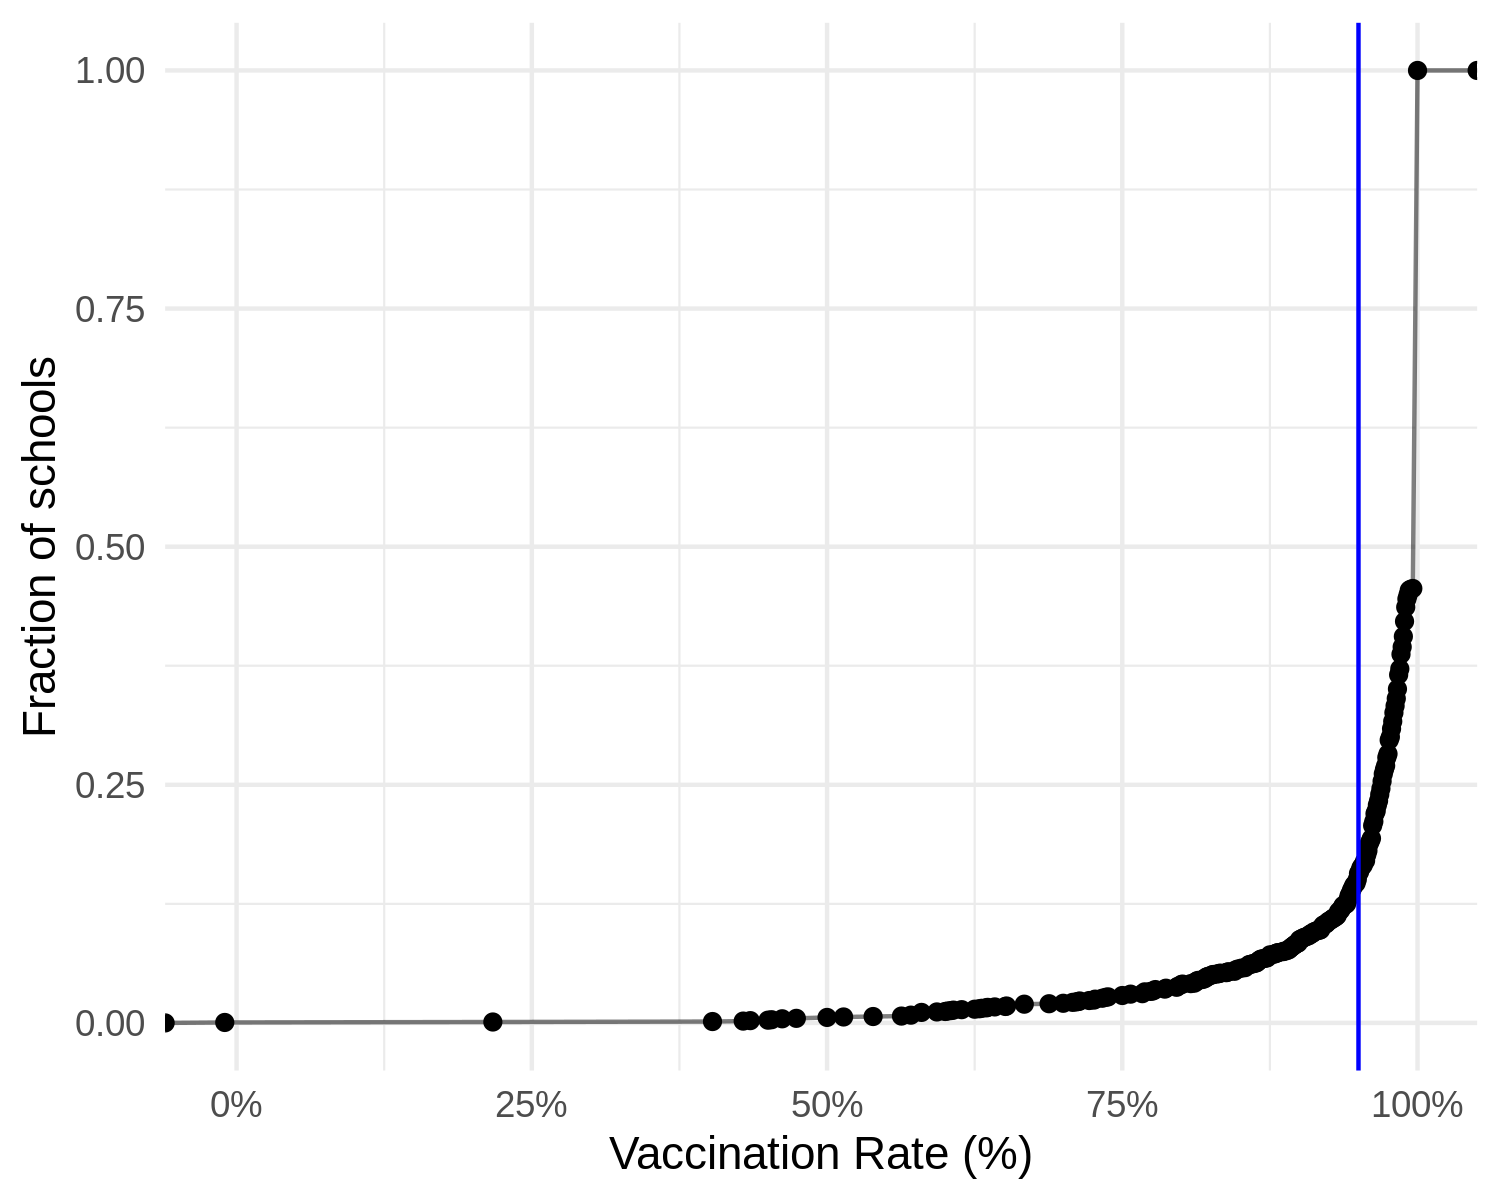

In [44]:
p = ggplot(ecdf, aes(x = (overall/100))) +
    stat_ecdf(geom = "point") +
    stat_ecdf(geom = "line", alpha = 0.5) +
    geom_vline(aes(xintercept = .95), color = 'blue') +
    scale_x_continuous(labels = scales::percent) +
    theme_minimal() +
    xlab(lab = "Vaccination Rate (%)") + 
    ylab(lab = "Fraction of schools")

p

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [26]:
median(ecdf$overall)

[1] 100

Yes, the median vaccination rate for NC schools is above the CDC recommended target of 95%.